In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [3]:
train_data=pd.read_csv('/home/ette/Desktop/Gesture_Classification_Accelerometer/Datase_ Built/train_data.csv')
val_data=pd.read_csv('/home/ette/Desktop/Gesture_Classification_Accelerometer/Datase_ Built/val_data.csv')
test_data=pd.read_csv('/home/ette/Desktop/Gesture_Classification_Accelerometer/Datase_ Built/test_data.csv')

In [4]:
x_train=train_data.drop(['label'], axis=1)
y_train=train_data['label']

x_val=val_data.drop(['label'], axis=1)
y_val=val_data['label']

x_test=test_data.drop(['label'], axis=1)
y_test=test_data['label']

In [5]:
scaled=StandardScaler()
x_train_s=scaled.fit_transform(x_train)
x_test_s=scaled.fit_transform(x_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score

# Random Forest Classifier

In [7]:
model=RandomForestClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.995772482705611

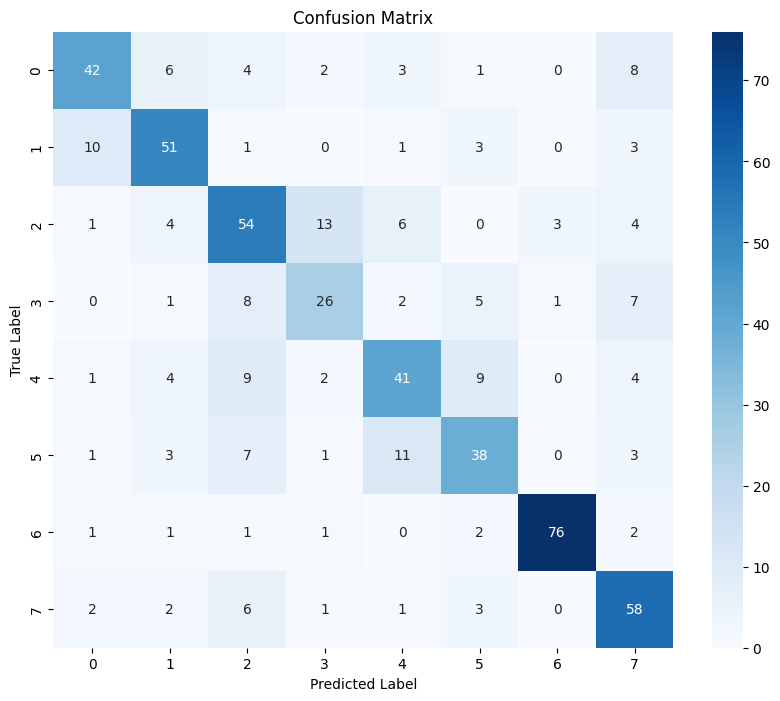

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        66
           1       0.71      0.74      0.72        69
           2       0.60      0.64      0.62        85
           3       0.57      0.52      0.54        50
           4       0.63      0.59      0.61        70
           5       0.62      0.59      0.61        64
           6       0.95      0.90      0.93        84
           7       0.65      0.79      0.72        73

    accuracy                           0.69       561
   macro avg       0.68      0.68      0.68       561
weighted avg       0.69      0.69      0.69       561



In [8]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

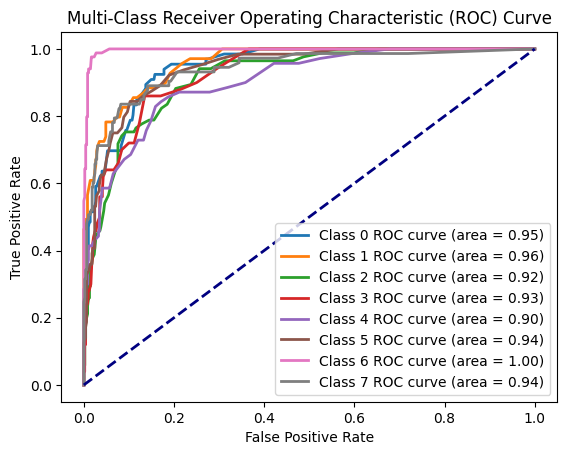

In [10]:
# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

y_score = model.predict_proba(x_test_s)  # Get probability scores
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Gini Coefficients:
Class 0: 0.89
Class 1: 0.91
Class 2: 0.83
Class 3: 0.85
Class 4: 0.81
Class 5: 0.88
Class 6: 0.99
Class 7: 0.88


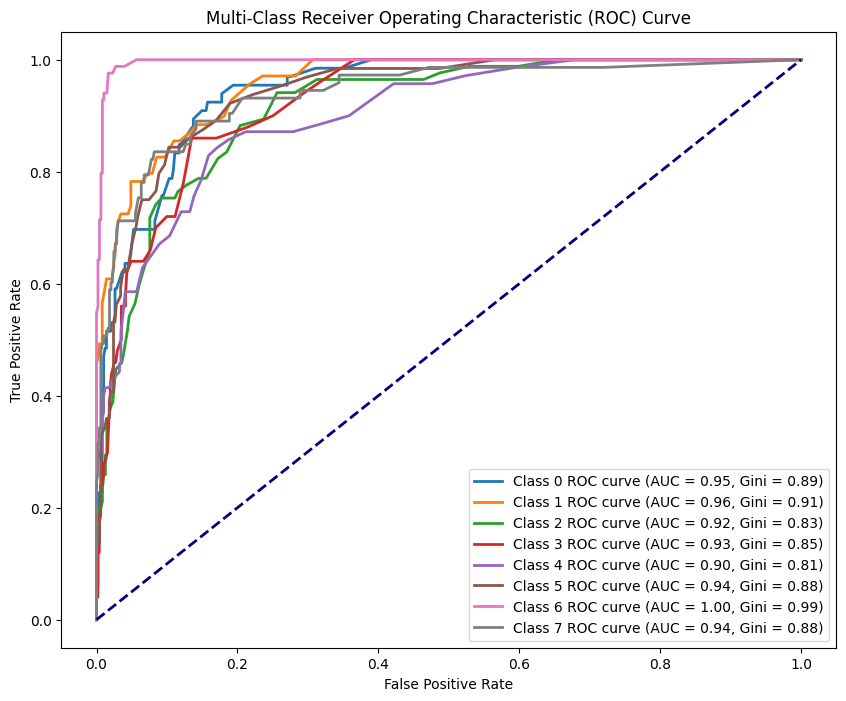

In [11]:
# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    print(f"Class {i}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [12]:
import joblib

In [13]:
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Gradient Boosting

In [14]:
model=GradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.9519600307455803

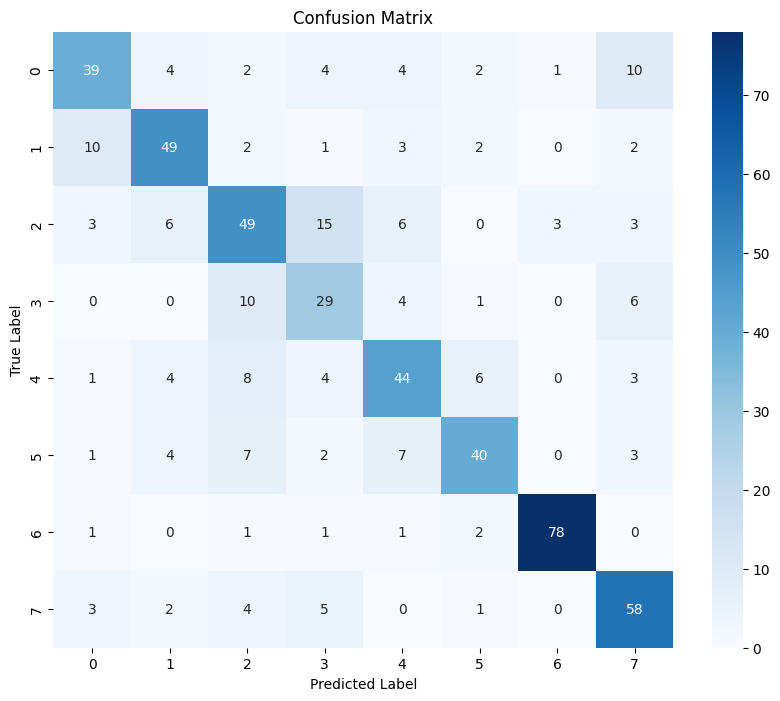

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.59      0.63        66
           1       0.71      0.71      0.71        69
           2       0.59      0.58      0.58        85
           3       0.48      0.58      0.52        50
           4       0.64      0.63      0.63        70
           5       0.74      0.62      0.68        64
           6       0.95      0.93      0.94        84
           7       0.68      0.79      0.73        73

    accuracy                           0.69       561
   macro avg       0.68      0.68      0.68       561
weighted avg       0.69      0.69      0.69       561



In [15]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

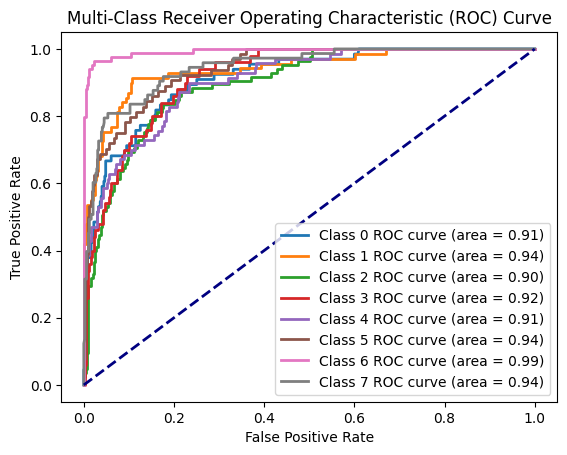

In [16]:
# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

y_score = model.predict_proba(x_test_s)  # Get probability scores
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Gini Coefficients:
Class 0: 0.83
Class 1: 0.88
Class 2: 0.80
Class 3: 0.84
Class 4: 0.82
Class 5: 0.88
Class 6: 0.99
Class 7: 0.89


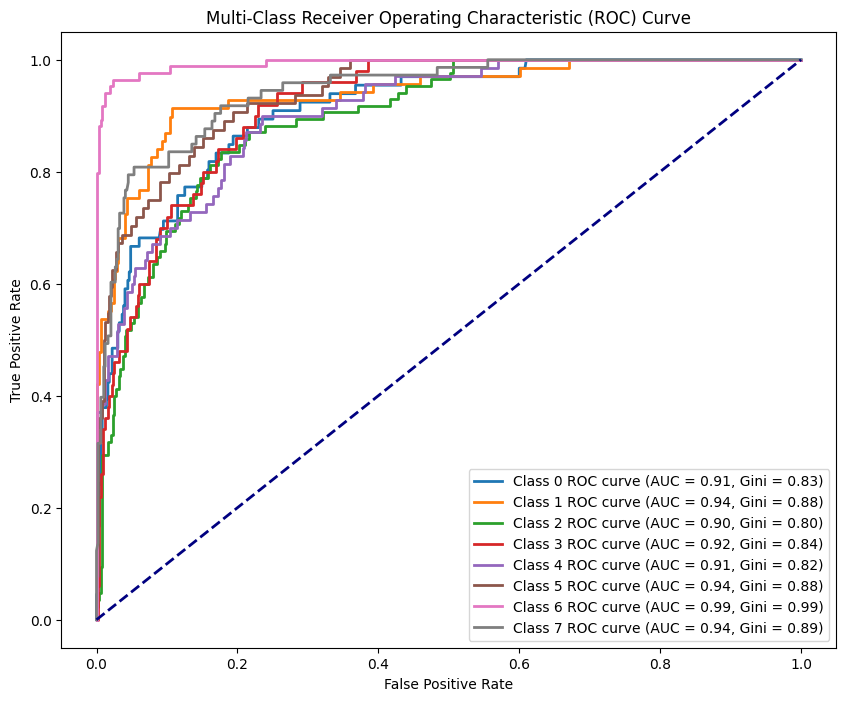

In [17]:
# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    print(f"Class {i}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# LGBM

In [18]:
model=LGBMClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8034
[LightGBM] [Info] Number of data points in the train set: 2602, number of used features: 33
[LightGBM] [Info] Start training from score -2.177060
[LightGBM] [Info] Start training from score -2.187282
[LightGBM] [Info] Start training from score -2.029225
[LightGBM] [Info] Start training from score -2.314960
[LightGBM] [Info] Start training from score -1.838170
[LightGBM] [Info] Start training from score -2.215061
[LightGBM] [Info] Start training from score -1.860149
[LightGBM] [Info] Start training from score -2.117832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/home/ette/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.995772482705611

/home/ette/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


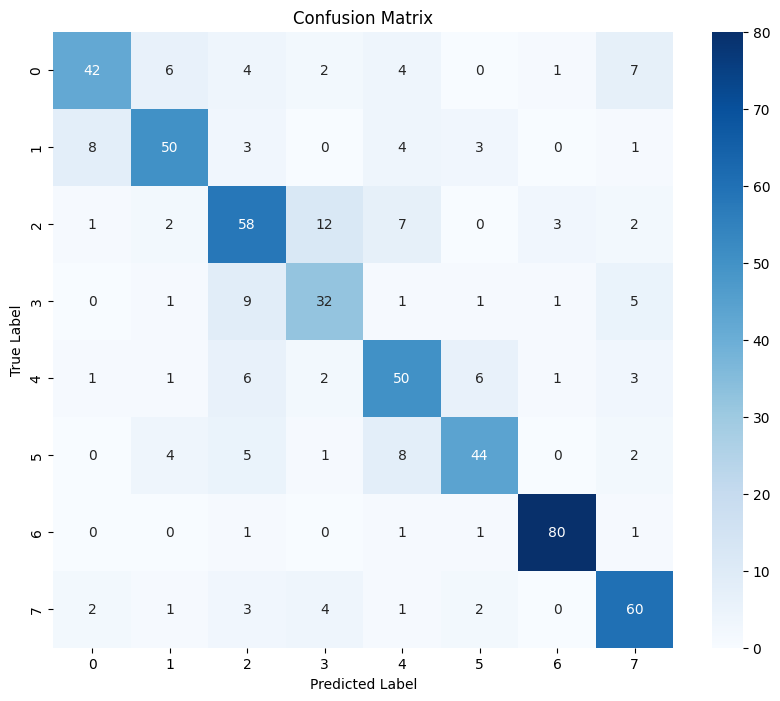

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        66
           1       0.77      0.72      0.75        69
           2       0.65      0.68      0.67        85
           3       0.60      0.64      0.62        50
           4       0.66      0.71      0.68        70
           5       0.77      0.69      0.73        64
           6       0.93      0.95      0.94        84
           7       0.74      0.82      0.78        73

    accuracy                           0.74       561
   macro avg       0.74      0.73      0.73       561
weighted avg       0.74      0.74      0.74       561



In [19]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

/home/ette/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


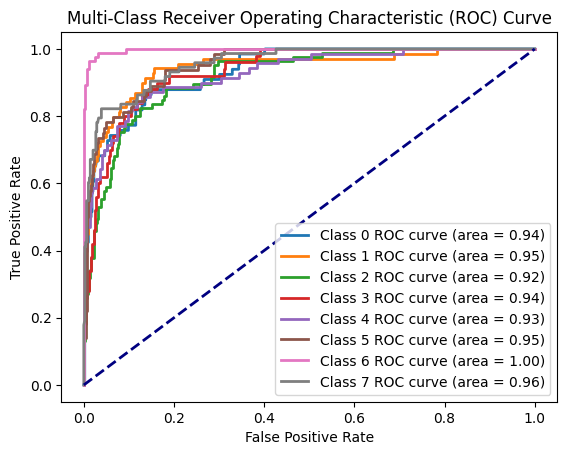

In [20]:
# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

y_score = model.predict_proba(x_test_s)  # Get probability scores
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Gini Coefficients:
Class 0: 0.87
Class 1: 0.89
Class 2: 0.84
Class 3: 0.87
Class 4: 0.86
Class 5: 0.91
Class 6: 0.99
Class 7: 0.91


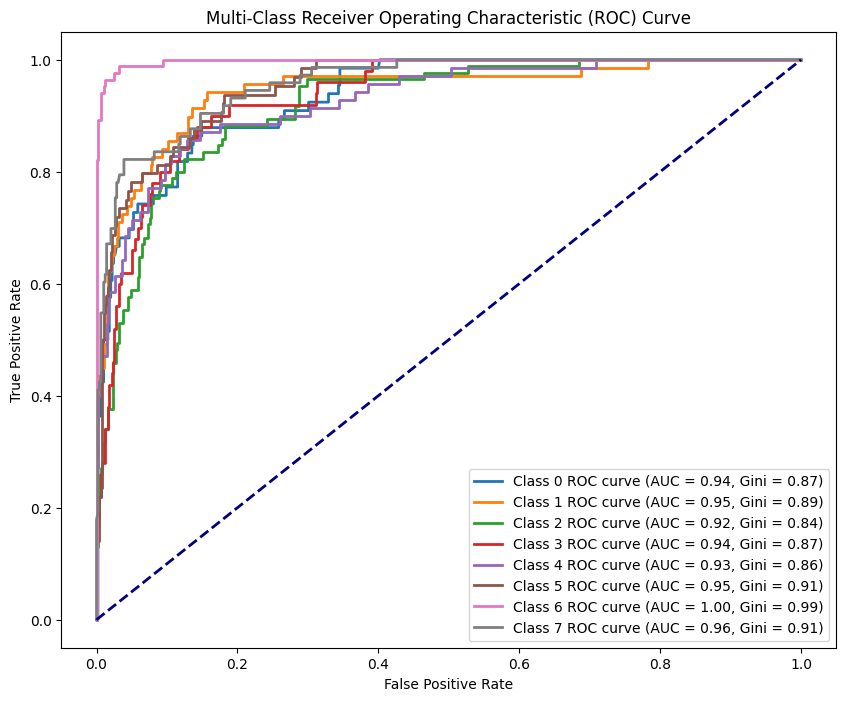

In [21]:
# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    print(f"Class {i}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# XGBoost

In [22]:
model=XGBClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.995772482705611

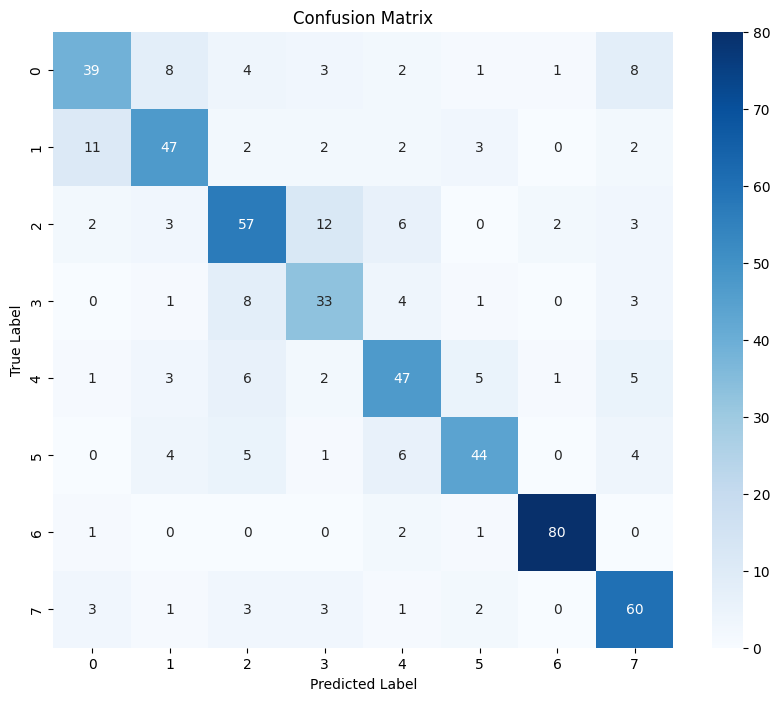

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        66
           1       0.70      0.68      0.69        69
           2       0.67      0.67      0.67        85
           3       0.59      0.66      0.62        50
           4       0.67      0.67      0.67        70
           5       0.77      0.69      0.73        64
           6       0.95      0.95      0.95        84
           7       0.71      0.82      0.76        73

    accuracy                           0.73       561
   macro avg       0.72      0.72      0.72       561
weighted avg       0.73      0.73      0.72       561



In [23]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

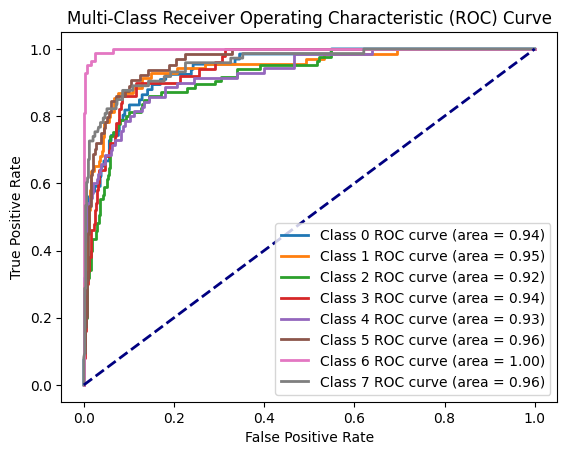

In [24]:
# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

y_score = model.predict_proba(x_test_s)  # Get probability scores
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Gini Coefficients:
Class 0: 0.89
Class 1: 0.89
Class 2: 0.84
Class 3: 0.89
Class 4: 0.85
Class 5: 0.92
Class 6: 1.00
Class 7: 0.91


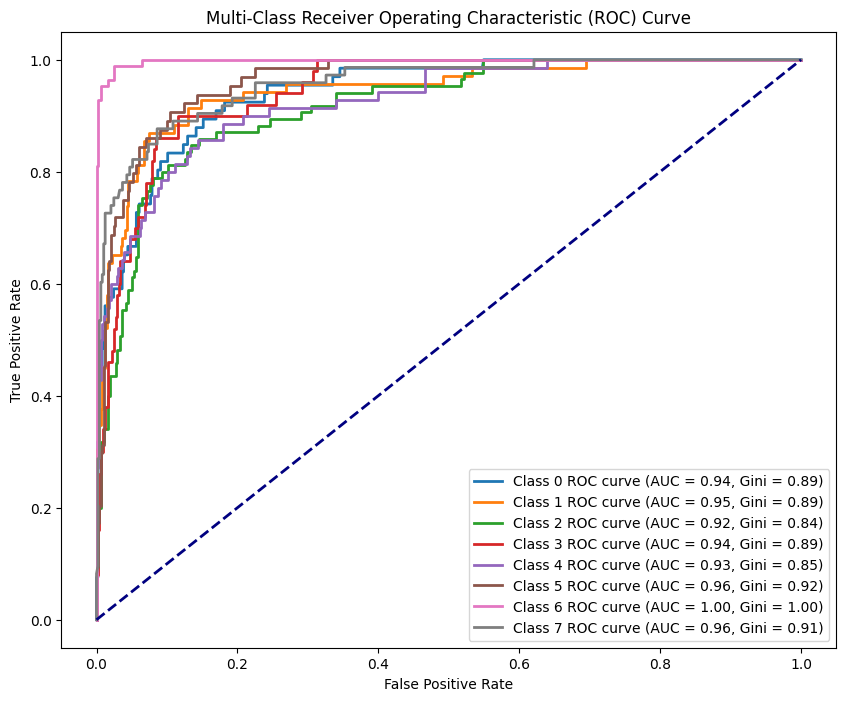

In [25]:
# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    print(f"Class {i}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# HistGradient Boosting

In [26]:
model=HistGradientBoostingClassifier().fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.995772482705611

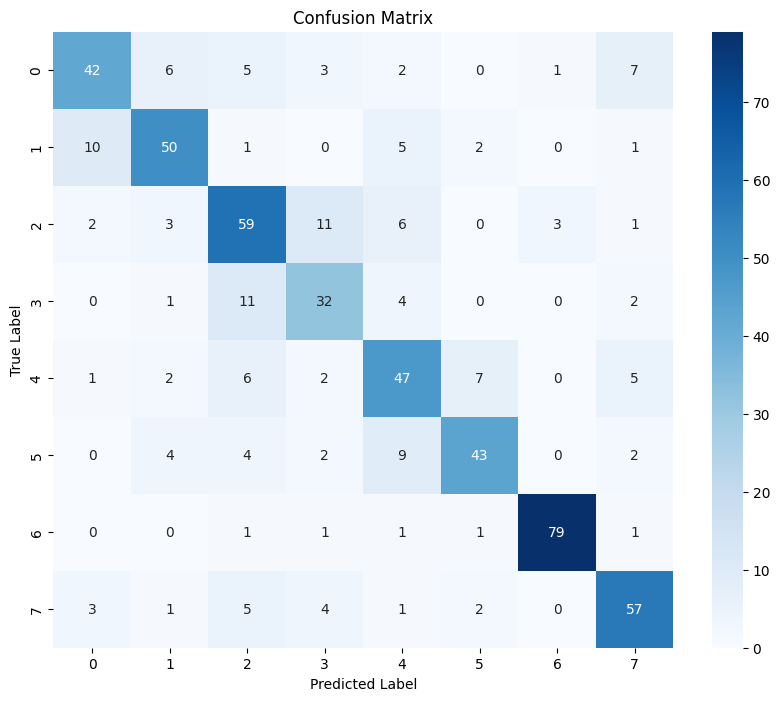

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        66
           1       0.75      0.72      0.74        69
           2       0.64      0.69      0.67        85
           3       0.58      0.64      0.61        50
           4       0.63      0.67      0.65        70
           5       0.78      0.67      0.72        64
           6       0.95      0.94      0.95        84
           7       0.75      0.78      0.77        73

    accuracy                           0.73       561
   macro avg       0.73      0.72      0.72       561
weighted avg       0.73      0.73      0.73       561



In [27]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

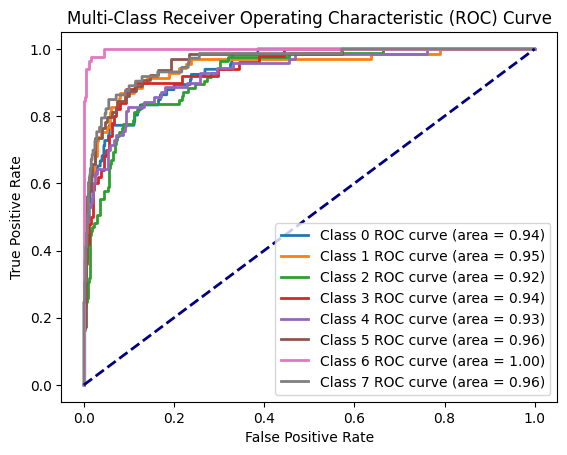

In [28]:
# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

y_score = model.predict_proba(x_test_s)  # Get probability scores
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Gini Coefficients:
Class 0: 0.88
Class 1: 0.90
Class 2: 0.85
Class 3: 0.89
Class 4: 0.86
Class 5: 0.92
Class 6: 1.00
Class 7: 0.92


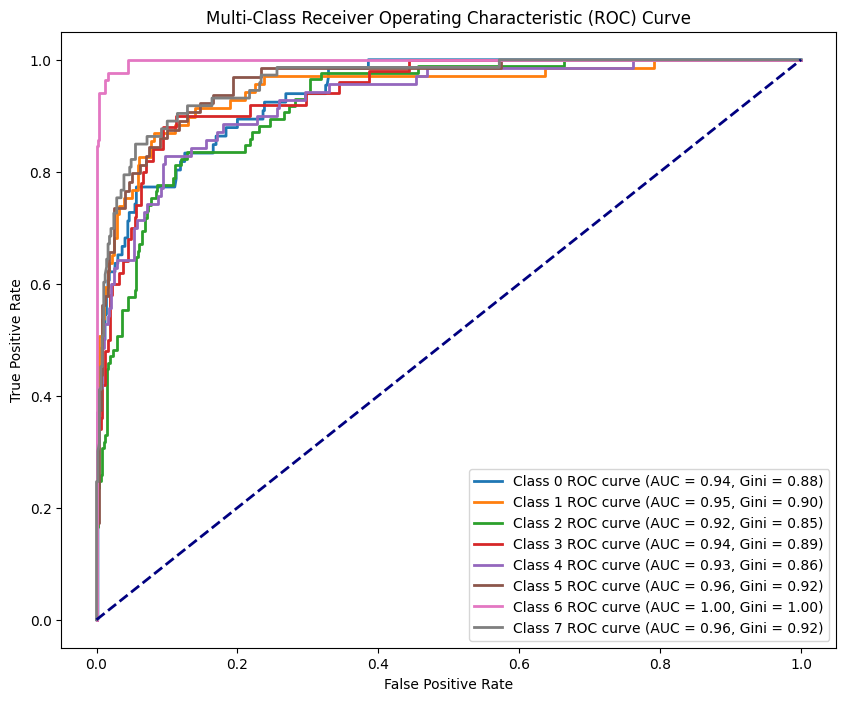

In [29]:
# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    print(f"Class {i}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## SVM

In [30]:
from sklearn.svm import SVC

In [31]:
model=SVC(kernel='rbf', C=1.0, probability=True).fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.6391237509607994

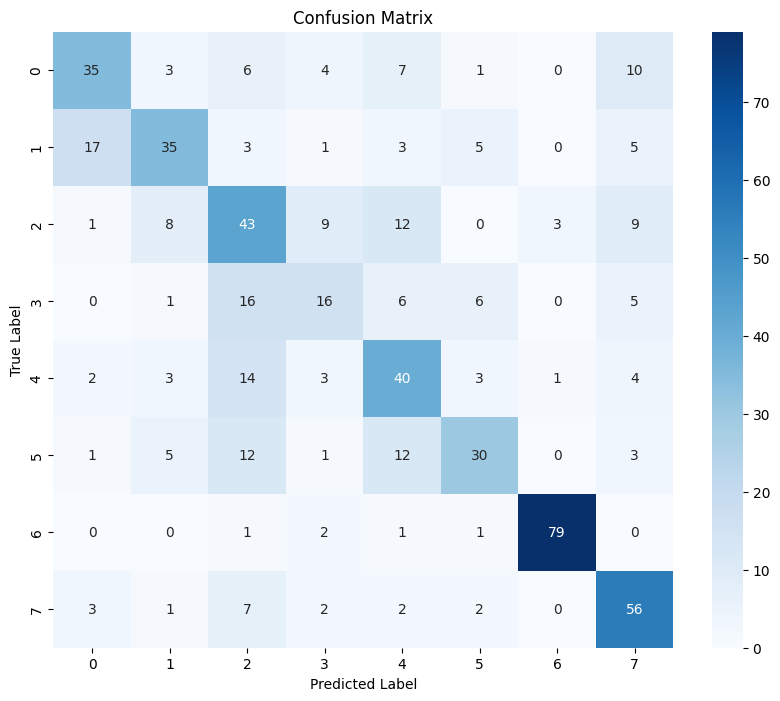

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        66
           1       0.62      0.51      0.56        69
           2       0.42      0.51      0.46        85
           3       0.42      0.32      0.36        50
           4       0.48      0.57      0.52        70
           5       0.62      0.47      0.54        64
           6       0.95      0.94      0.95        84
           7       0.61      0.77      0.68        73

    accuracy                           0.60       561
   macro avg       0.59      0.58      0.58       561
weighted avg       0.60      0.60      0.59       561



In [32]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

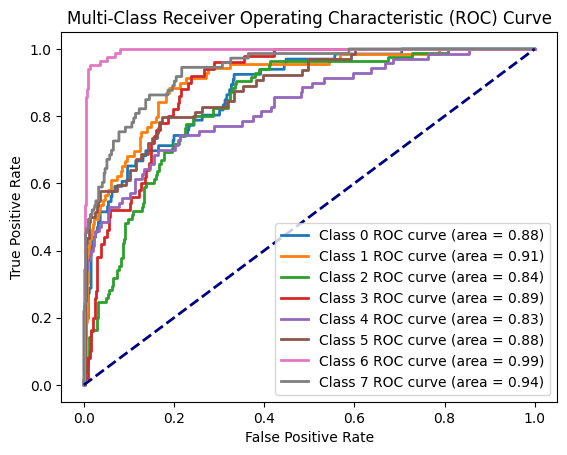

In [33]:
# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

y_score = model.predict_proba(x_test_s)  # Get probability scores
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Gini Coefficients:
Class 0: 0.75
Class 1: 0.81
Class 2: 0.68
Class 3: 0.79
Class 4: 0.67
Class 5: 0.77
Class 6: 0.99
Class 7: 0.87


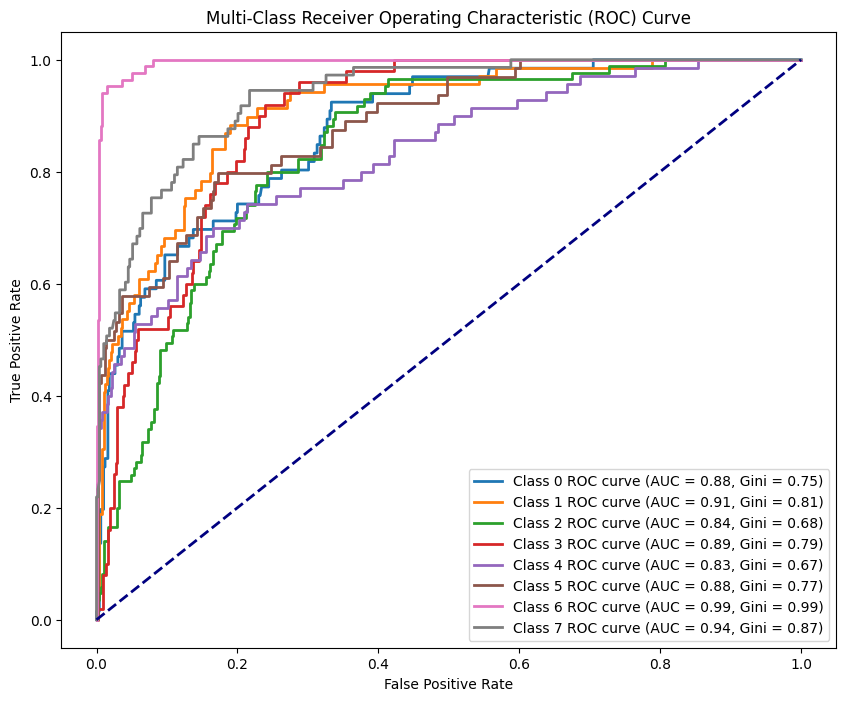

In [34]:
# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    print(f"Class {i}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
k = 8  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

In [37]:
model=knn.fit(x_train_s, y_train)
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

0.7974634896233667

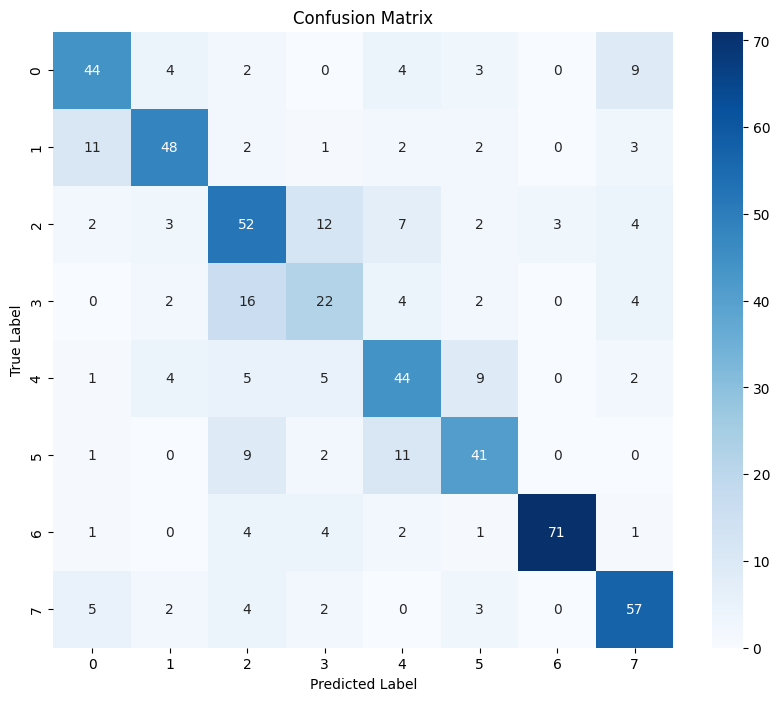

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.67        66
           1       0.76      0.70      0.73        69
           2       0.55      0.61      0.58        85
           3       0.46      0.44      0.45        50
           4       0.59      0.63      0.61        70
           5       0.65      0.64      0.65        64
           6       0.96      0.85      0.90        84
           7       0.71      0.78      0.75        73

    accuracy                           0.68       561
   macro avg       0.67      0.66      0.67       561
weighted avg       0.68      0.68      0.68       561



In [38]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

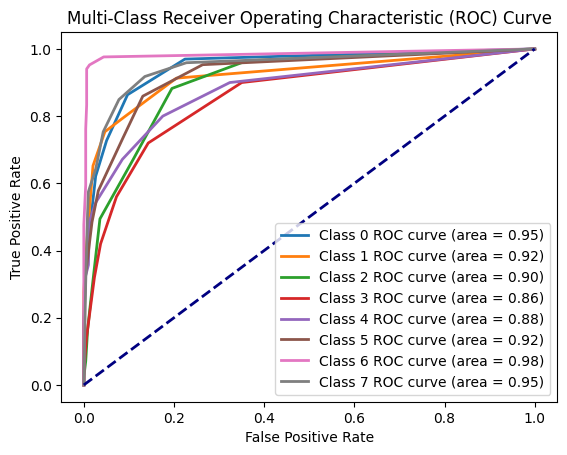

In [39]:
# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

y_score = model.predict_proba(x_test_s)  # Get probability scores
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Gini Coefficients:
Class 0: 0.89
Class 1: 0.84
Class 2: 0.80
Class 3: 0.71
Class 4: 0.76
Class 5: 0.85
Class 6: 0.97
Class 7: 0.89


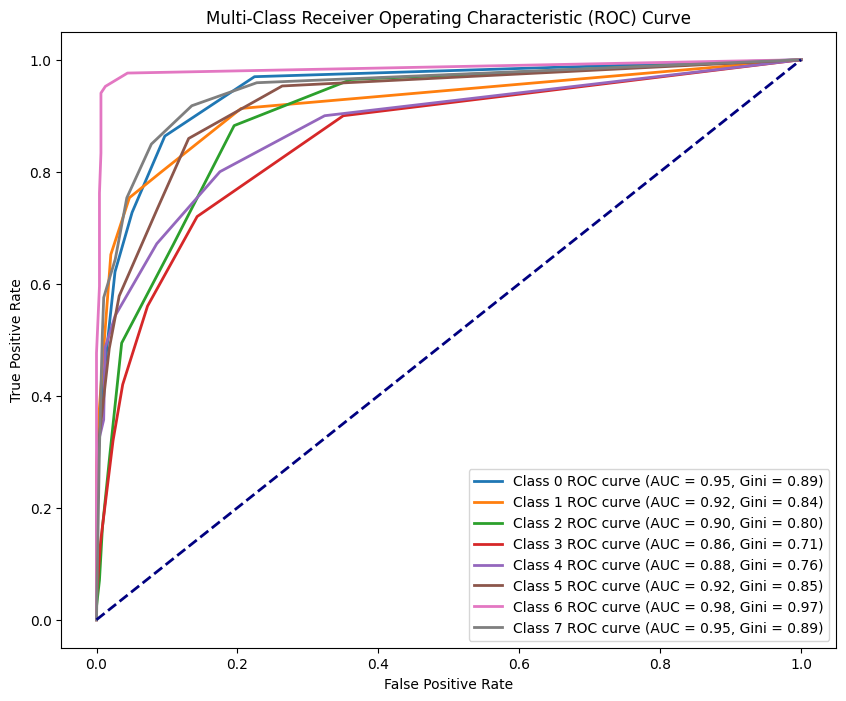

In [40]:
# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    print(f"Class {i}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Linear Discriminant Analysis

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [42]:
lda = LinearDiscriminantAnalysis()
model=lda.fit(x_train, y_train)

In [43]:
y_train_pred=model.predict(x_train_s)
accuracy_score(y_train_pred, y_train)

/home/ette/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


0.5522674865488086

/home/ette/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


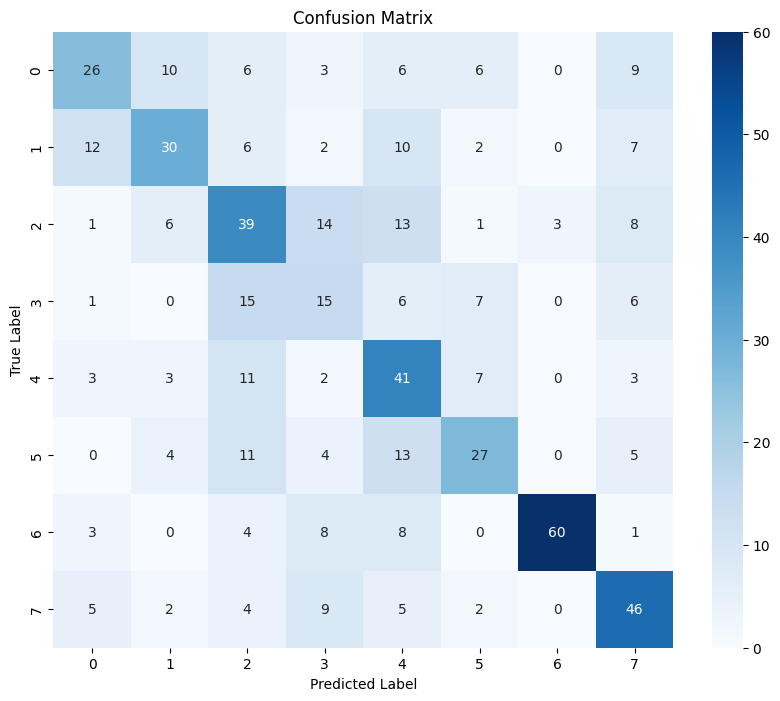

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.39      0.44        66
           1       0.55      0.43      0.48        69
           2       0.41      0.46      0.43        85
           3       0.26      0.30      0.28        50
           4       0.40      0.59      0.48        70
           5       0.52      0.42      0.47        64
           6       0.95      0.71      0.82        84
           7       0.54      0.63      0.58        73

    accuracy                           0.51       561
   macro avg       0.52      0.49      0.50       561
weighted avg       0.53      0.51      0.51       561



In [44]:
y_pred = model.predict(x_test_s)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("Classification Report:")
print(class_report)

/home/ette/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


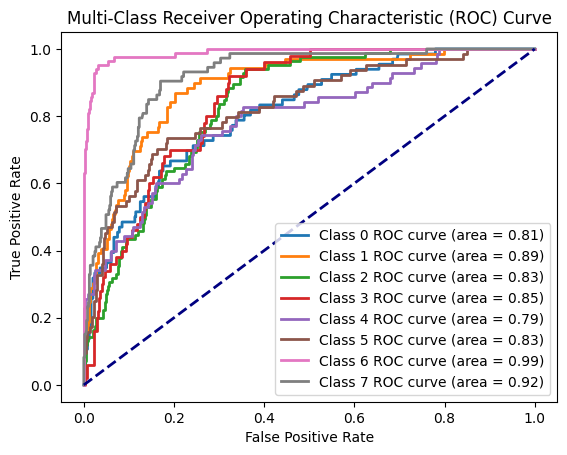

In [45]:
# Binarize labels for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

y_score = model.predict_proba(x_test_s)  # Get probability scores
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()